In [12]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

In [6]:
#Importing the text data:
rawData = open('SMSSpamCollection.tsv').read()

rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [9]:
#Parsing the data: replacing \t with \n and split the rows at \n
parsedData = rawData.replace('\t', '\n').split('\n')

parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [10]:
#Split the data into labels and texts:

label = parsedData[0::2]
text = parsedData[1::2]

#Printing to verify
print(label[0:5])
print("-------------------------")
print(text[0:5])

In [14]:
#Creating a dataframe from these lists:

fullCorpus = pd.DataFrame({
    'label': label,
    'body_text': text
})

fullCorpus.head()

ValueError: arrays must all be same length

In [22]:
#checking the length of the arrays:
print(len(label))
print(len(text))

5571
5570


In [28]:
#Checking the entries in label list
label[-5::]


#Creating a dataframe from these lists:

fullCorpus = pd.DataFrame({
    'label': label[:-1],
    'body_text': text
})

fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [36]:
#Using pandas to read the tsv file

dataset = pd.read_csv("SMSSpamCollection.tsv", sep = '\t', header = None)

#Naming the columns:

dataset.columns = ['label', 'body_text']
#Displaying the head rows:
dataset.head()

len(dataset)

5568

In [37]:
# Exploring the Dataset:

#What is the shape of the dataset?
print("Length of the dataset: ", len(dataset))
print("Number of columns: ", len(dataset.columns))

Length of the dataset:  5568
Number of columns:  2


In [38]:
#Number of spam/ham records
print("Number of spam records: ", len(dataset[dataset['label']== 'spam']))
print("Number of ham records: ", len(dataset[dataset['label']== 'ham']))


Number of spam records:  746
Number of ham records:  4822


From the above numbers we can see that the records are lopsided in the favor of ham records. This will be revisited during feature engineering step.

In [40]:
#Number of missing data

print("Number of null values in label: ", dataset['label'].isnull().sum())
print("Number of body_text values in label: ", dataset['body_text'].isnull().sum())

Number of null values in label:  0
Number of body_text values in label:  0


### PREPROCESSING STEP:

1. Remove Punctuations
2. Tokenize
3. remove stopwords
4. Lemmatization/Stemming

In [42]:
#Expanding the display for columns:
pd.set_option('display.max_colwidth', 100)

dataset.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [46]:
#1. remove punctuations:

import string

def remove_punc(text):
    text_nopunc = "".join([char for char in text if char not in string.punctuation])
    return text_nopunc

#Lambda function to clean the punctuations 
dataset['body_text_clean'] = dataset['body_text'].apply(lambda x: remove_punc(x))

dataset.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [47]:
#2. Tokenize the cleaned string

import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

dataset['body_text_tokenize'] = dataset['body_text_clean'].apply(lambda x: tokenize(x.lower()))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenize
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [48]:
#3. Remove all stopwords:

import nltk

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

dataset['body_text_no_stopword'] = dataset['body_text_tokenize'].apply(lambda x: remove_stopwords(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_no_stopword
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [50]:
#3. Stemming: Process of reducing a word to their stem or root:
# Eg. running, runs, run : will be reduced to 'run' -- correct
# Eg. Meaning, Meanness is reduced to mean -- incorrect

ps = nltk.PorterStemmer()

print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

print("-----------")
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))
print(ps.stem('ran'))


grow
grow
grow
-----------
run
run
runner
ran


In [52]:
#Stemming

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

dataset['body_text_stem'] = dataset['body_text_no_stopword'].apply(lambda x: stemming(x))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_no_stopword,body_text_stem
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [55]:
#Lemmatization: Process of grouping together the different forms of words under a root word. 
#It is a more informed decision, as it returns a dictionary word. 
#It may be computationally expensive, but returns closest correct word.
#Stemming just chops of the ending of the word, it may not be accurate

wn = nltk.WordNetLemmatizer()

print(ps.stem('meanness'))
print(ps.stem('meaning'))

print("----------------------------")

print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

#if lemmatize doesnt find a root word, it returns the original word

print("****************************")
print(ps.stem('goose'))
print(ps.stem('geese'))
print("----------------------------")
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))


#Lemmatize gave the correct root word.

mean
mean
----------------------------
meanness
meaning
****************************
goos
gees
----------------------------
goose
goose


In [56]:
#Lemmatization


def lemmatize(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dataset['body_text_lemma'] = dataset['body_text_no_stopword'].apply(lambda x: lemmatize(x))

dataset.head()



,label,body_text,body_text_clean,body_text_tokenize,body_text_no_stopword,body_text_stem,body_text_lemma
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


### Vectorization

1. Raw text needs to be converted into numbers, so that python and the ML models can understand.
2. Count vectorization :- Count the number of times words are repeated to decide if spam or ham
3. N-gram vectorization :-
4. TF-IDF weighing :- 


In [66]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [67]:
#fit = It will only train the count_vect, no changes to the dataset
#fit_transform = it will return the vectorized version of the dataset

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(dataset['body_text'])

print(X_counts.shape) #(r,c) == len, unique_words
print(count_vect.get_feature_names()) #print all the unique words present


(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [68]:
data_sample = dataset[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])

print(X_counts_sample.shape) #(r,c) == len, unique_words
print(count_vect_sample.get_feature_names()) #print all the unique words present

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

In [72]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())

X_counts_df.columns = count_vect_sample.get_feature_names()

X_counts_df


,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### 2. N-Gram Vectorization

This creates a document-term matrix where instead of single term columns, they represent combinations if 'n' adjacent words from your text.


In [73]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopword])
    return text

dataset['cleaned_text'] = dataset['body_text'].apply(lambda x: clean_text(x))
dataset.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_no_stopword,body_text_stem,body_text_lemma,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday


In [74]:
#N-gram will still use CountVectorizer

ngram_vect = CountVectorizer(ngram_range =(2,2))
ngram_X_counts = ngram_vect.fit_transform(dataset['cleaned_text'])

print(ngram_X_counts.shape) #(r,c) == len, unique_words
#print(count_vect.get_feature_names()) #print all the unique words present

(5568, 31275)


In [81]:
data_sample = dataset[0:20]

ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])

print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

In [82]:
ngram_counts_df = pd.DataFrame(X_counts_sample.toarray())
ngram_counts_df.columns = ngram_vect_sample.get_feature_names()
ngram_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. TF-IDF

higher the value, rarer the word

In [83]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer= clean_text)
X_tfidf = tfidf_vect.fit_transform(dataset['body_text'])

print(X_tfidf.shape)
#print(tfidf_vect.get_feature_names())

(5568, 8107)


In [87]:
data_sample = dataset[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer= clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])

print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

In [88]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())

X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()

X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Feature Engineering

1. Feature Creation
2. Feature Evaluation
3. Identifying Feature for transformation
4. Box-Cox power transformation

In [90]:
#Using pandas to read the tsv file

rawdata = pd.read_csv("SMSSpamCollection.tsv", sep = '\t', header = None)

#Naming the columns:

rawdata.columns = ['label', 'body_text']
#Displaying the head rows:
rawdata.head()

len(rawdata)

5568

In [111]:
#1.Feature Creation
#creating text message length as a feature

dataset['body_len'] = dataset['body_text'].apply(lambda x: len(x) - x.count(" "))

dataset.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_no_stopword,body_text_stem,body_text_lemma,cleaned_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday,28


In [112]:
#create % of text that is punctuation as feature

import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100 # returns percentage

dataset['punct%'] = dataset['body_text'].apply(lambda x: count_punct(x))

dataset.head()


#Column punct% shows how much % of punctuations are present in that message. Assuming that a spam message wi

,label,body_text,body_text_clean,body_text_tokenize,body_text_no_stopword,body_text_stem,body_text_lemma,cleaned_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]",date sunday,28,7.1


In [101]:
#2. Evaluate feature creation:

from matplotlib import pyplot
import numpy as np
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


C:\Users\18646\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\18646\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


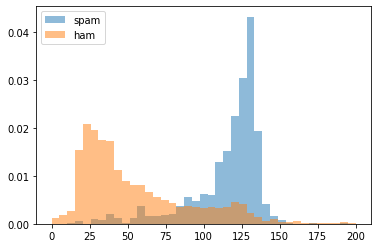

In [115]:
bins = np.linspace(0, 200, 40)

pyplot.hist(dataset[dataset['label']== 'spam']['body_len'], bins, alpha = 0.5, normed=True, label = 'spam')
pyplot.hist(dataset[dataset['label']== 'ham']['body_len'], bins, alpha = 0.5, normed=True, label = 'ham')

pyplot.legend(loc='upper left')
pyplot.show()

C:\Users\18646\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\18646\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


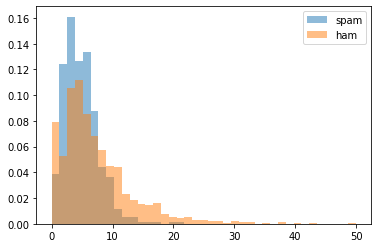

In [103]:
bins = np.linspace(0, 50, 40)

pyplot.hist(dataset[dataset['label']== 'spam']['punct%'], bins, alpha = 0.5, normed=True, label = 'spam')
pyplot.hist(dataset[dataset['label']== 'ham']['punct%'], bins, alpha = 0.5, normed=True, label = 'ham')

pyplot.legend(loc='upper right')
pyplot.show()

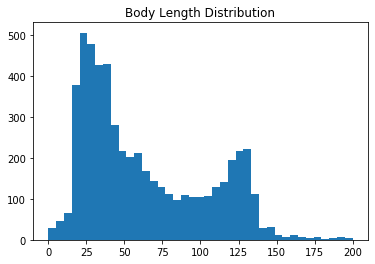

In [116]:
#3. ID feature for transformation

bins = np.linspace(0, 200, 40)
pyplot.hist(dataset['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()


# this wouldnt be ideal because it isnt skewed to one side, and doesnt really have any outliers

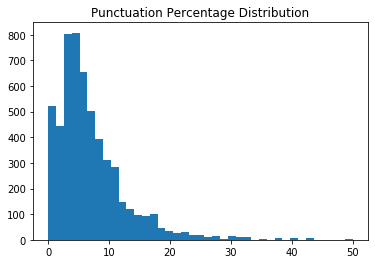

In [117]:
bins = np.linspace(0, 50, 40)
pyplot.hist(dataset['punct%'], bins)
pyplot.title("Punctuation Percentage Distribution")
pyplot.show()

#Select this feature because it has skewed data

In [108]:
#4. Using Box-Cox transformation for the selected feature

#alters the value of each datapoint in a systematic way in order to get cleaner data

#1. range of exponents to test
#2. Apply each transformation to each value of the chose feature
#3. Use a criteria to identify which transformation yields the best distribution

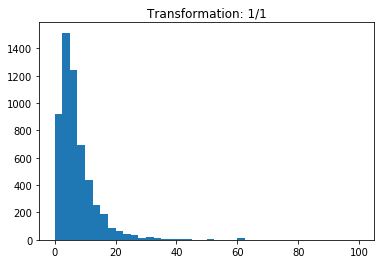

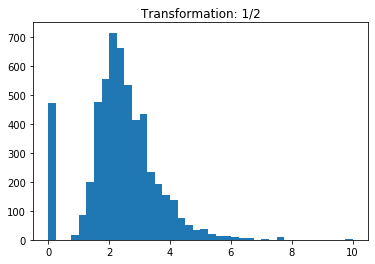

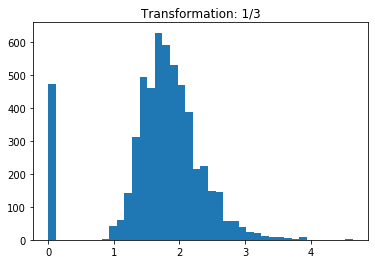

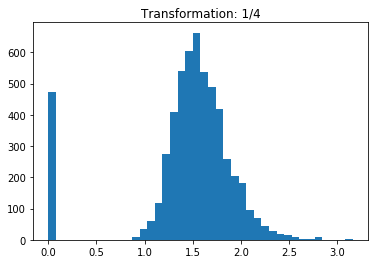

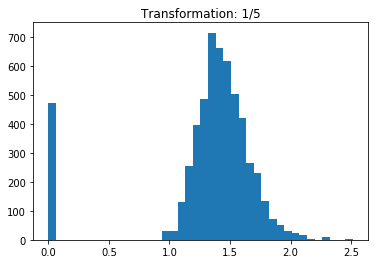

In [118]:
for i in [1,2,3,4,5]:
    pyplot.hist((dataset['punct%']) ** (1/i), bins = 40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

In [119]:
#Choosing transformation 1/4 or 1/5

# Building ML Classifier

## 1. Random Classifier:
    Using TFIDF vectorizer
    

In [120]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# RF with cross validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs= -1) #allows to run faster by creating decision trees in parallel
k_fold = KFold(n_splits = 5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring= 'accuracy', n_jobs = -1)

array([0.97576302, 0.97396768, 0.97124888, 0.96046721, 0.97304582])

In [123]:
#RF with holdout set

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_features, data['label'], test_size = 0.2)

In [124]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs= -1)
rf_model = rf1.fit(X_train,Y_train)

In [125]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.06110174873507186, 7350),
 (0.05577552216044384, 'body_len'),
 (0.035933627995375084, 2031),
 (0.027563675341635414, 3134),
 (0.023262890393775725, 6746),
 (0.021506950622717885, 5988),
 (0.020949730771044943, 1803),
 (0.019767382028366472, 5724),
 (0.01691197312506353, 3443),
 (0.01570409074822112, 2171)]

In [128]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(Y_test, y_pred, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision,3),
                                                        round(recall,3),
                                                        round((y_pred == Y_test).sum()/len(y_pred),3)))
                                                    

Precision: 1.0 / Recall: 0.541 / Accuracy: 0.935


In [144]:
# RF with grid search : exhaustively search all parameter combinations in a given grid to determine the best model

def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, Y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(Y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==Y_test).sum() / len(y_pred), 3)))

In [145]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.28 / Accuracy: 0.899
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.51 / Accuracy: 0.931
Est: 10 / Depth: 30 ---- Precision: 0.981 / Recall: 0.662 / Accuracy: 0.951
Est: 10 / Depth: None ---- Precision: 0.984 / Recall: 0.796 / Accuracy: 0.969
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.185 / Accuracy: 0.885
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.541 / Accuracy: 0.935
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.669 / Accuracy: 0.953
Est: 50 / Depth: None ---- Precision: 0.976 / Recall: 0.777 / Accuracy: 0.966
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.197 / Accuracy: 0.887
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.554 / Accuracy: 0.937
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.669 / Accuracy: 0.953
Est: 100 / Depth: None ---- Precision: 0.984 / Recall: 0.783 / Accuracy: 0.968


## Gradient Boosting

iterative approach to combine weak learners to create a strong learner by focusing on mistakes of prior iterations, trying to minimize the error each time

RF -> Bagging -> samples randomly -> training parallel -> final predictions are unweighted average -> easier to tune, faster to train, harder to overfit

XBOOST -> Boosting -> samples with an increased weight on the sample that were previously wrong -> training iterative -> final predictions are weighted -> harder to tune, slower to train, easy to overfit.



In [148]:
from sklearn.ensemble import GradientBoostingClassifier

def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, Y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(Y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==Y_test).sum()/len(y_pred), 3)))

In [149]:
#This can take upto 2 hours to complete!!!

for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

C:\Users\18646\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.859
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.942 / Recall: 0.72 / Accuracy: 0.954
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.906 / Recall: 0.739 / Accuracy: 0.952
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.025 / Accuracy: 0.863
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.942 / Recall: 0.822 / Accuracy: 0.968
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.888 / Recall: 0.809 / Accuracy: 0.959
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.006 / Accuracy: 0.86
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.929 / Recall: 0.834 / Accuracy: 0.968


KeyboardInterrupt: 

# Model Selection

First the dataset needs to be split into train and test
and then it should be vectorized.
therefore it only recognizes columns in training set. and not the new_words in test set



In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text', 'body_len', 'punct%']], data['label'], test_size=0.2)

In [151]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098
0,45,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,43,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597231,0.0,0.0
2,26,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,126,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,129,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Initially we had about 8k columns, i.e., 8k unique words.
now due to the changes we have about 7k words. this means there are about 1k unique words in test set alone that will not be considered in this model

In [152]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [155]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 4.441 / Predict time: 0.183 ---- Precision: 1.0 / Recall: 0.833 / Accuracy: 0.975


In [156]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 234.772 / Predict time: 0.134 ---- Precision: 0.946 / Recall: 0.839 / Accuracy: 0.969


Further Evaluation:

slice test set
examine only the messages the model gets wrong
Decide on the basis of business problem:
    Do they want faster predict time?
    do they prioritize precision or recall?
        eg. spam filter - optimize for precision 
            anitivirus - optimize for recall
            
This case choosing RF is better.
